In [1]:
# dataset: https://www.kaggle.com/competitions/digit-recognizer/data 

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/handtyped_nn/train.csv')

In [5]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

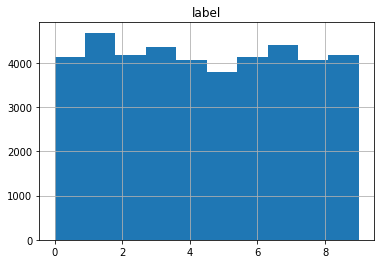

In [6]:
data.hist('label')

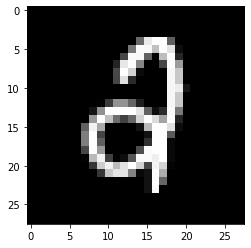

In [65]:
plt.imshow(data.values[10000][1:].reshape(28, 28), cmap='gray')

In [66]:
data.values[10000][:1]

array([2])

In [8]:
def split_data_1to1(data):
    test = data[::2]
    train = data[1::2]
    sns.displot(test['label'], bins=10, kde=True);
    sns.displot(train['label'], bins=10, kde=True);
    return test, train

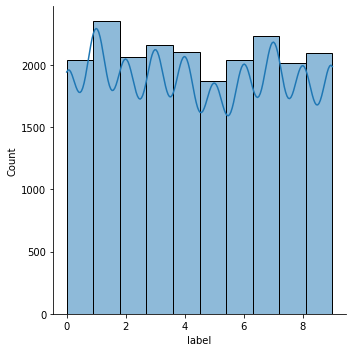

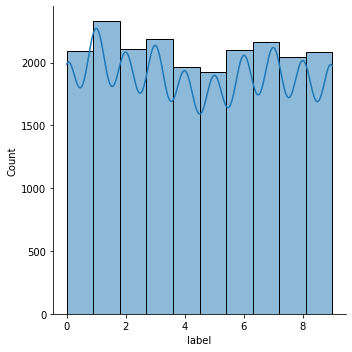

In [9]:
test, train = split_data_1to1(data)

In [241]:
class MyNN:
    def __init__(self):
        self._weights0 = np.random.rand(784, 49) * 0.01
        self._weights1 = np.random.rand(49, 16) * 0.01
        self._weights2 = np.random.rand(16, 10) * 0.01

        self._input  = np.zeros([784])
        self._layer1 = np.zeros([49])
        self._layer2 = np.zeros([16])
        self._output = np.zeros([10])

    def zero(self):
        self._input  = np.zeros([784])
        self._layer1 = np.zeros([49])
        self._layer2 = np.zeros([16])
        self._output = np.zeros([10])
    
    def act_sigmoid(self, layer):
        return np.array([1/(1+np.exp(-x)) for x in layer])

    def act_relu(self, layer):
        return np.array([x if x > 0 else 0 for x in layer])

    def predict(self, img):
        self.zero()
        self._input = img
        
        self._layer1 = np.dot(self._input, self._weights0)
        self._layer1 = self.act_relu(self._layer1)
        
        self._layer2 = np.dot(self._layer1, self._weights1)
        self._layer2 = self.act_relu(self._layer2)
        
        self._output = np.dot(self._layer2, self._weights2)
        #self._output = self.act_relu(self._output)
        
        return self._output

    def learn(self, labels):
        learn_rate = 0.1

        main_delta = self._output - labels
        delta_w_2 = np.dot(self._weights2, np.diag(main_delta))
        delta_l_2 = delta_w_2.sum(axis=1)
        delta_w_1 = np.dot(self._weights1, np.diag(delta_l_2))
        delta_l_1 = delta_w_1.sum(axis=1)
        delta_w_0 = np.dot(self._weights0, np.diag(delta_l_1))
        
        active_neurons_l_2 = [1 if x >= 0 else 0 for x in self._layer2]
        active_neurons_l_1 = [1 if x >= 0 else 0 for x in self._layer1]
        
        self._weights0 = learn_rate* self._weights0 * delta_w_0
        self._weights1 = learn_rate * np.dot(np.diag(active_neurons_l_1), self._weights1) * delta_w_1
        self._weights2 = learn_rate * np.dot(np.diag(active_neurons_l_2), self._weights2) * delta_w_2
        

In [242]:
NN = MyNN()
NN.predict( data.values[1][1:] )

array([2.78546105, 4.67121574, 3.92583862, 4.42095833, 4.70735148,
       4.38687429, 2.59148333, 4.73990358, 4.15914311, 4.53220164])

In [237]:
for i in range(20):
    NN.predict( data.values[1][1:] )
    NN.learn([1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    print( (NN.predict( data.values[1][1:])-[1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).sum() )
    #print(NN.predict( data.values[1][1:] ))
    #print(NN._weights2)

126529847.40068859
2.2617274378280132e+30
5.357226778579487e+164
-1.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/tmp/ipykernel_5359/681346821.py:52: RuntimeWarning: overflow encountered in multiply
  self._weights0 = learn_rate* self._weights0 * delta_w_0
/tmp/ipykernel_5359/681346821.py:53: RuntimeWarning: overflow encountered in multiply
  self._weights1 = learn_rate * np.dot(np.diag(active_neurons_l_1), self._weights1) * delta_w_1
/tmp/ipykernel_5359/681346821.py:54: RuntimeWarning: overflow encountered in multiply
  self._weights2 = learn_rate * np.dot(np.diag(active_neurons_l_2), self._weights2) * delta_w_2


In [212]:
NN = MyNN()
NN.predict( data.values[1][1:] )

array([4.96350059, 4.66144076, 4.82593038, 5.52114227, 4.61042712,
       5.1187669 , 4.04329045, 6.64150744, 6.05428929, 5.10676517])

In [213]:
for i in range(10):
    NN.learn([1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    print( (NN.predict( data.values[1][1:])-[1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).sum() )
    print(NN.predict( data.values[1][1:] ))

-0.9999999999993631
[4.58453273e-14 4.79461585e-14 5.56758050e-14 7.53338104e-14
 4.30349342e-14 5.62106381e-14 3.79104036e-14 1.24117193e-13
 9.28034165e-14 5.80474846e-14]
-1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [211]:
NN.predict( data.values[1][1:])-[1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [130]:
np.diag([1, 2, 3]).sum(axis=0)

array([1, 2, 3])

In [131]:
np.array([[1, 2, 3],
          [2, 3, 4], 
          [5, 6, 7]]).sum(axis=1)

array([ 6,  9, 18])

In [132]:
np.array([[1, 1],[2, 2]]) * np.array([[3, 3],[2, 2]])

array([[3, 3],
       [4, 4]])

In [75]:
1.5*0.8


1.2000000000000002

In [83]:
x = 1.2
e = np.exp(-x)
e / ((1+e)**2)


0.1778944406468057

In [84]:
0.17*(-0.64)*0.8

-0.08704

In [118]:
NN = MyNN()

In [100]:
NN.zero()

In [119]:
NN._layer2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [120]:
NN._output

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [121]:
NN.predict( data.values[1][1:] )

array([5633793.92914131, 4836656.01892454, 5271023.88709368,
       4584051.29181172, 4249069.85045225, 4575528.92297332,
       4291669.71440995, 3078168.42754737, 4705356.24397623,
       4156591.39723179])

In [122]:
NN._layer2

array([502255.6204929 , 590272.25126358, 487307.99771798, 513311.73693806,
       530191.37330762, 650047.81175073, 492232.41385991, 605187.47928701,
       541236.26725308, 539327.09254307, 539500.06236431, 549692.99643817,
       631610.14420339, 509727.52314487, 537379.049546  , 599338.95376207])

In [74]:
del NN

In [16]:
a = np.ones([4])
b = np.ones([4, 2])

In [17]:
np.dot(b, a)

ValueError: shapes (4,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)